In [ ]:
# PCA Clássica para classificar banco de dados iris.dat

<div style="text-align: right">Exercício de sala<br>Felipe Tassario Gomes - N. USP 5396784<br>Vitor Boschi</div>

O banco de dados iris.dat foi um conjunto de dados publicado em 1936, contendo um conjunto de observações sobre 4 característiscas diferentes do gênero de flores *Iris*. Essas características foram medidas para 150 amostras, divididas igualmente entre 3 espécies de flor: *Iris setosa*, *Iris virginica* e *Iris versicolor*.
As 4 características são:
1. comprimento da sépala
2. largura da sépala
3. comprimento da pétala
4. largura da pétala


### Ler dados
Primeiramente vamos importar as bibliotecas necessárias e ler o arquivos de dados iris.dat

In [1]:
%matplotlib inline
import numpy as np

from pybrain.tools.shortcuts import *
from pybrain.datasets import *
from pybrain.supervised.trainers import *
from pybrain.structure.modules import *

from matplotlib.pyplot import *

np.set_printoptions(precision=4, suppress=True)

In [2]:
training_file = open('iris.data','r')

input_array = []
output_array = []

for x in training_file.readlines():
    if (x.strip() == ''):
        continue

    line = x.strip().split(',')
    
    
    this_input = [float(num) for num in line[:-1]]
    
    output_name = line[-1]
    name_map = {
        "Iris-setosa": 0,
        "Iris-versicolor": 1,
        "Iris-virginica": 2
    }
    this_output = name_map.get(output_name) #output value
    
    input_array.append(this_input)
    output_array.append(this_output)
    
    #print "Added entry: ", this_input, " => ", output_name, "(%d)" % this_output

print "Added %d entries in the dataset" % len(input_array)

assert(len(input_array) == len(output_array))
#    DS.addSample(inputs, output_value)

Added 150 entries in the dataset


In [3]:
unique_info = np.unique(output_array, return_counts=True)
unique_info

(array([0, 1, 2]), array([50, 50, 50]))

In [26]:
input_array = np.array(input_array)


### Normalização

Normalização para distribuição Gaussiana, mean=0 and variance=1.

In [27]:
# Primeiro transformamos nossa coluna de entrada numa estrada de array do numpy
normalized_input = np.array(input_array)

# Agora dividimos cada elemento da matriz pelo maior valor em sua coluna,
# normalizando assim as 4 propriedades na entrada.
normalized_input = normalized_input - normalized_input.mean(axis=0)
normalized_input = normalized_input / normalized_input.std(axis=0)
assert(normalized_input.shape == (150, 4))


## Matriz de covariância

In [24]:
norm_cov = np.cov(normalized_input.T)
norm_cov

array([[ 1.0067, -0.1101,  0.8776,  0.8234],
       [-0.1101,  1.0067, -0.4233, -0.3589],
       [ 0.8776, -0.4233,  1.0067,  0.9692],
       [ 0.8234, -0.3589,  0.9692,  1.0067]])

In [28]:
## Auto-valores e auto-vetores

In [99]:
eig = np.linalg.eig(norm_cov)
eig

(array([ 2.9304,  0.9274,  0.1483,  0.0207]),
 array([[ 0.5224, -0.3723, -0.721 ,  0.262 ],
        [-0.2634, -0.9256,  0.242 , -0.1241],
        [ 0.5813, -0.0211,  0.1409, -0.8012],
        [ 0.5656, -0.0654,  0.6338,  0.5235]]))

In [113]:
eigvals = eig[0]

# The documentation of np.linalg.eig says:
# - The normalized (unit “length”) eigenvectors, such that the column
# - v[:,i] is the eigenvector corresponding to the eigenvalue w[i].
#
# This means that the eigenvectors are transposed

eigvecs = eig[1].T

#contribuicoes de cada dimensao
contribs = eigvals / eigvals.sum()
contribs

array([ 0.7277,  0.2303,  0.0368,  0.0052])

In [114]:
for i in range(len(eigvecs)):
    print np.linalg.norm(eigvecs[i])

1.0
1.0
1.0
1.0


In [115]:
#contribuicoes cumulativas
acumulado = 0
for i in range(len(contribs)):
    acumulado += contribs[i]
    print "%d dimensao: %.2f%%" % (i + 1, acumulado * 100)

1 dimensao: 72.77%
2 dimensao: 95.80%
3 dimensao: 99.48%
4 dimensao: 100.00%


In [372]:
vecs_to_use = 2

new_input = np.ndarray((len(input_array), vecs_to_use))
new_input.shape

for i in range(len(input_array)):
    for j in range(vecs_to_use):
        new_input[i][j] = normalized_input[i].dot(eigvecs[j])

new_input

array([[-2.2645, -0.5057],
       [-2.0864,  0.6554],
       [-2.368 ,  0.3185],
       [-2.3042,  0.5754],
       [-2.3888, -0.6748],
       [-2.0705, -1.5185],
       [-2.4457, -0.0746],
       [-2.2338, -0.2476],
       [-2.342 ,  1.0951],
       [-2.1887,  0.4486],
       [-2.1635, -1.0706],
       [-2.3274, -0.1586],
       [-2.2241,  0.7091],
       [-2.6397,  0.9383],
       [-2.1923, -1.89  ],
       [-2.2515, -2.7224],
       [-2.2028, -1.5138],
       [-2.1902, -0.5143],
       [-1.8941, -1.4311],
       [-2.3399, -1.158 ],
       [-1.9146, -0.4305],
       [-2.2046, -0.9525],
       [-2.7742, -0.4895],
       [-1.8204, -0.1068],
       [-2.2282, -0.1622],
       [-1.957 ,  0.6079],
       [-2.0521, -0.266 ],
       [-2.1682, -0.552 ],
       [-2.1403, -0.3366],
       [-2.2688,  0.3149],
       [-2.1446,  0.4839],
       [-1.8319, -0.4453],
       [-2.6082, -1.8285],
       [-2.438 , -2.1854],
       [-2.1887,  0.4486],
       [-2.2111,  0.1843],
       [-2.0444, -0.685 ],
 

In [91]:
eig_vals, eig_vecs = np.linalg.eig(norm_cov)
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])


Eigenvalues in descending order:
2.93035377559
0.927403621517
0.148342226482
0.0207460139956


In [109]:
print(eigvecs[])
print(eig_pairs[1][1])

[-0.3723 -0.9256 -0.0211 -0.0654]
[-0.3723 -0.9256 -0.0211 -0.0654]


In [105]:
eig_vecs[:,0]

array([ 0.5224, -0.2634,  0.5813,  0.5656])

In [110]:
matrix_w = np.hstack((eigvecs[0].reshape(4,1),
                      eigvecs[1].reshape(4,1)))
matrix_w



#matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
 #                     eig_pairs[1][1].reshape(4,1)))

Y = normalized_input.dot(matrix_w)
matrix_w

array([[ 0.5224, -0.3723],
       [-0.2634, -0.9256],
       [ 0.5813, -0.0211],
       [ 0.5656, -0.0654]])

### Exibindo resultados


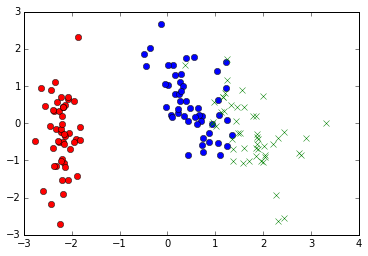

In [362]:
figures = [
    "ro",  #red circle
    "bo",  #blue circle
    "gx"   #green X
    ]

figure(1)
#xlim(-1, 1)
#ylim(-1, 1)
for i in range(len(input_array)):
    point = new_input[i]
    plot(point[0], point[1], figures[output_array[i]])



# PCA Adaptativa

In [373]:
N_entradas = 4
N_saidas = 2

W =  (np.random.rand(N_entradas, N_saidas))/2
U =  np.zeros((N_saidas, N_saidas))

#gera uma saida
def apresentar_entrada(input):
    saida = np.zeros(N_saidas)
    
    for j in range(N_saidas):
        for i in range(N_entradas):
            saida[j] += W[i][j] * input[i]

    for i in range(N_saidas):
        for j in range(N_saidas):
            if i >= j:
                continue
            
            saida[j] += U[i][j] * saida[i]
            
    return saida

def atualizar_W(input, saida, neta):
    for i in range(N_entradas):
        for j in range(N_saidas):
            delta = neta * input[i] * saida[j]
            W[i][j] += delta
            
def atualizar_J(saida, mu):
    for i in range(N_saidas):
        for j in range(N_saidas):
            if i >= j:
                continue
                
            delta = - mu * saida[i] * saida[j]
            U[i][j] += delta

def normalizar_W():
    return W / W.max(axis=0)
    

def neta(epoch_num):
    return 0.1 / epoch_num
    
def run_epoch(db, epoch_num):
    inputs = np.random.permutation(db)
    
    saida_total = np.ndarray((len(input_array), N_saidas))
    
    for i in range(len(inputs)):
        saida = apresentar_entrada(inputs[i])
        atualizar_W(inputs[i], saida, neta(epoch_num))
        W = normalizar_W()
        atualizar_J(saida, neta(epoch_num))
        saida_total[i] = saida
        
    return saida_total

    

In [317]:
inputs = np.random.permutation(normalized_input)

In [313]:
inp = inputs[0]
saida = apresentar_entrada(inp)

print "saida", saida
print "W", W
print "U", U

atualizar_W(inp, saida, 0.01)
atualizar_J(saida, 0.01)

print "atualizado"
print "W", W
print "U", U

print "normalizado"
normalizar_W()

saida [-0.165 -0.321]
W [[ 0.0223  0.356 ]
 [ 0.1133  0.1437]
 [ 0.2123  0.2512]
 [ 0.0916  0.1805]]
U [[ 0.      0.    ]
 [-0.0005  0.    ]]
atualizado
W [[ 0.0226  0.3566]
 [ 0.1105  0.1382]
 [ 0.2142  0.255 ]
 [ 0.0936  0.1843]]
U [[ 0.     0.   ]
 [-0.001  0.   ]]
normalizado


array([[ 0.1054,  1.    ],
       [ 0.5157,  0.3875],
       [ 1.    ,  0.715 ],
       [ 0.4368,  0.5168]])

In [318]:
for i in range(200):
    print "running", i
    run_epoch(normalized_input, i+1)

running 0
running 1
running 2
running 3
running 4
running 5
running 6
running 7
running 8
running 9
running 10
running 11
running 12
running 13
running 14
running 15
running 16
running 17
running 18
running 19
running 20
running 21
running 22
running 23
running 24
running 25
running 26
running 27
running 28
running 29
running 30
running 31
running 32
running 33
running 34
running 35
running 36
running 37
running 38
running 39
running 40
running 41
running 42
running 43
running 44
running 45
running 46
running 47
running 48
running 49
running 50
running 51
running 52
running 53
running 54
running 55
running 56
running 57
running 58
running 59
running 60
running 61
running 62
running 63
running 64
running 65
running 66
running 67
running 68
running 69
running 70
running 71
running 72
running 73
running 74
running 75
running 76
running 77
running 78
running 79
running 80
running 81
running 82
running 83
running 84
running 85
running 86
running 87
running 88
running 89
running 90
running 9

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:36: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:40: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:37: RuntimeWarning: invalid value encountered in double_scalars


# MLP

In [374]:
def generate_dataset(input, target):
    DS = ClassificationDataSet(len(input[0]), class_labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
    for i in range(0, len(input)):
        DS.addSample(input[i], target[i])
    return DS

DS = generate_dataset(new_input, output_array)

# Verificar que os dados estão como esperado
DS.calculateStatistics()

{0: 50, 1: 50, 2: 50}

In [375]:
DS.getField("input")[52]

array([ 1.2421, -0.6148])

In [376]:
DS._convertToOneOfMany()

In [377]:
DS.outdim

3

In [378]:
DS.getField("target")[52]

array([0, 1, 0], dtype=int32)

In [379]:
TrainDS, TestDS = DS.splitWithProportion(0.75)

print "Treino: %d, Teste: %d" % (len(TrainDS), len(TestDS))

Treino: 112, Teste: 38


In [380]:
def criar_rede(dataset, learningrate=0.5):
    # Criando a rede neural
    network = buildNetwork(dataset.indim, 5, dataset.outdim, bias=True, outclass = SoftmaxLayer)
    
    # Criando o objeto "trainer" da rede neural
    trainer = BackpropTrainer(network, dataset, learningrate)
    return network, trainer

network, trainer = criar_rede(TrainDS)

In [381]:
def treinar_rede(trainer, targetErr=0.01):
    # Treinando a rede
    treinos = 0
    err = 10000
    while err > targetErr:
        err = trainer.train()
        treinos += 1

        #Exibir progresso a cada 100 iterações
        if treinos % 20 == 0:
            print "Progresso: treinos: %d, erro: %f" % (treinos, err)

        if treinos > 1000:
            break

    print "\nTotal de treinos: %d" % treinos
    print "            Erro: %f\n" % err
    
treinar_rede(trainer)


Progresso: treinos: 20, erro: 0.017904
Progresso: treinos: 40, erro: 0.023471
Progresso: treinos: 60, erro: 0.019587
Progresso: treinos: 80, erro: 0.020345
Progresso: treinos: 100, erro: 0.017501
Progresso: treinos: 120, erro: 0.017841
Progresso: treinos: 140, erro: 0.017721
Progresso: treinos: 160, erro: 0.019492
Progresso: treinos: 180, erro: 0.018176
Progresso: treinos: 200, erro: 0.018063
Progresso: treinos: 220, erro: 0.019122
Progresso: treinos: 240, erro: 0.019132
Progresso: treinos: 260, erro: 0.018254
Progresso: treinos: 280, erro: 0.018815
Progresso: treinos: 300, erro: 0.016792
Progresso: treinos: 320, erro: 0.016209
Progresso: treinos: 340, erro: 0.017545
Progresso: treinos: 360, erro: 0.015414
Progresso: treinos: 380, erro: 0.015826
Progresso: treinos: 400, erro: 0.014317
Progresso: treinos: 420, erro: 0.017860
Progresso: treinos: 440, erro: 0.016200
Progresso: treinos: 460, erro: 0.016860
Progresso: treinos: 480, erro: 0.017776
Progresso: treinos: 500, erro: 0.016738
Prog

In [382]:
def validar_dados(network, dataset, verbose=False):
    errors = 0;
    input = dataset.getField('input')
    output = dataset.getField('target')
    
    for i in range(len(dataset)):
        netw = [int(round(x)) for x in network.activate(input[i])]
        expc = [x for x in output[i]]
    
        if (netw != expc):
            errors += 1

        if verbose:
            print netw, " == ", expc, "%s" % "" if netw == expc else " error!"

    print "\nErrors: %d out of %d (%f%%)" % (errors, len(dataset), float(errors) / len(dataset) * 100)

validar_dados(network, TestDS, verbose=True)

[0, 1, 0]  ==  [0, 1, 0] 
[0, 0, 1]  ==  [0, 0, 1] 
[0, 1, 0]  ==  [0, 0, 1]  error!
[1, 0, 0]  ==  [1, 0, 0] 
[0, 1, 0]  ==  [0, 1, 0] 
[0, 1, 0]  ==  [0, 0, 1]  error!
[0, 1, 0]  ==  [0, 1, 0] 
[1, 0, 0]  ==  [1, 0, 0] 
[0, 1, 0]  ==  [0, 1, 0] 
[0, 0, 1]  ==  [0, 0, 1] 
[1, 0, 0]  ==  [1, 0, 0] 
[1, 0, 0]  ==  [1, 0, 0] 
[0, 1, 0]  ==  [0, 0, 1]  error!
[0, 0, 1]  ==  [0, 0, 1] 
[0, 0, 1]  ==  [0, 0, 1] 
[0, 1, 0]  ==  [0, 1, 0] 
[1, 0, 0]  ==  [1, 0, 0] 
[0, 0, 1]  ==  [0, 0, 1] 
[0, 1, 0]  ==  [0, 1, 0] 
[0, 1, 0]  ==  [0, 1, 0] 
[1, 0, 0]  ==  [1, 0, 0] 
[0, 0, 1]  ==  [0, 0, 1] 
[1, 0, 0]  ==  [1, 0, 0] 
[0, 0, 1]  ==  [0, 0, 1] 
[0, 1, 0]  ==  [0, 1, 0] 
[0, 1, 0]  ==  [0, 0, 1]  error!
[0, 1, 0]  ==  [0, 0, 1]  error!
[0, 1, 0]  ==  [0, 1, 0] 
[0, 1, 0]  ==  [0, 1, 0] 
[1, 0, 0]  ==  [1, 0, 0] 
[0, 1, 0]  ==  [0, 1, 0] 
[1, 0, 0]  ==  [1, 0, 0] 
[0, 0, 1]  ==  [0, 0, 1] 
[1, 0, 0]  ==  [1, 0, 0] 
[0, 0, 1]  ==  [0, 0, 1] 
[0, 1, 0]  ==  [0, 1, 0] 
[0, 1, 0]  ==  [0, 1, 0] 
[0,

## MLP com dados originais

In [383]:
OriginalDS = generate_dataset(normalized_input, output_array)

# Verificar que os dados estão como esperado
OriginalDS.calculateStatistics()

{0: 50, 1: 50, 2: 50}

In [384]:
OriginalDS._convertToOneOfMany()

In [385]:
OriginalTrainDS, OriginalTestDS = OriginalDS.splitWithProportion(0.75)
print "Treino: %d, Teste: %d" % (len(OriginalTrainDS), len(OriginalTestDS))

Treino: 112, Teste: 38


In [386]:
network, trainer = criar_rede(OriginalTrainDS)

In [387]:
treinar_rede(trainer)


Total de treinos: 9
            Erro: 0.009180



In [388]:
validar_dados(network, OriginalTestDS, verbose=True)

[1, 0, 0]  ==  [1, 0, 0] 
[0, 0, 1]  ==  [0, 0, 1] 
[1, 0, 0]  ==  [1, 0, 0] 
[0, 1, 0]  ==  [0, 1, 0] 
[0, 1, 0]  ==  [0, 1, 0] 
[0, 1, 0]  ==  [0, 1, 0] 
[0, 1, 0]  ==  [0, 1, 0] 
[0, 0, 1]  ==  [0, 0, 1] 
[1, 0, 0]  ==  [1, 0, 0] 
[1, 0, 0]  ==  [1, 0, 0] 
[0, 0, 1]  ==  [0, 0, 1] 
[0, 1, 0]  ==  [0, 1, 0] 
[1, 0, 0]  ==  [1, 0, 0] 
[0, 0, 1]  ==  [0, 0, 1] 
[0, 1, 0]  ==  [0, 1, 0] 
[0, 0, 1]  ==  [0, 0, 1] 
[1, 0, 0]  ==  [1, 0, 0] 
[0, 0, 1]  ==  [0, 0, 1] 
[0, 1, 0]  ==  [0, 1, 0] 
[0, 0, 1]  ==  [0, 0, 1] 
[0, 1, 0]  ==  [0, 1, 0] 
[0, 1, 0]  ==  [0, 1, 0] 
[1, 0, 0]  ==  [1, 0, 0] 
[0, 1, 0]  ==  [0, 1, 0] 
[0, 0, 1]  ==  [0, 0, 1] 
[1, 0, 0]  ==  [1, 0, 0] 
[1, 0, 0]  ==  [1, 0, 0] 
[1, 0, 0]  ==  [1, 0, 0] 
[0, 0, 1]  ==  [0, 0, 1] 
[0, 0, 1]  ==  [0, 0, 1] 
[0, 1, 0]  ==  [0, 1, 0] 
[0, 1, 0]  ==  [0, 1, 0] 
[0, 1, 0]  ==  [0, 1, 0] 
[0, 0, 1]  ==  [0, 0, 1] 
[1, 0, 0]  ==  [1, 0, 0] 
[0, 1, 0]  ==  [0, 1, 0] 
[0, 1, 0]  ==  [0, 1, 0] 
[1, 0, 0]  ==  [1, 0, 0] 

Errors: 0 o